In [29]:
from dotenv import load_dotenv
import os

_ = load_dotenv()

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model='gemini-1.5-flash',
                             temperature=1,
)


In [13]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to Spanish. Think to yourself about how you would translate a sentence from English to Spanish. Think of a different ways to translate the sentence",
    ),
    ("human", "I love programming."),
]

ai_msg = llm.invoke(messages)

In [16]:
print(ai_msg.content)

There are several ways to translate "I love programming" into Spanish, each with slightly different nuances:

* **Me encanta programar:** This is a very common and natural translation.  "Encantar" implies a strong liking, a feeling of delight.  It's a good all-around choice.

* **Amo programar:** This translates literally to "I love programming," using the verb "amar" which is a stronger verb than "encantar." It suggests a more passionate love.

* **Me apasiona programar:** This translates to "Programming is my passion" or "I'm passionate about programming." It emphasizes the enthusiasm and dedication involved.

* **Adoro programar:** Similar to "encantar," "adorar" expresses a strong liking, but perhaps with a hint of reverence or admiration.

The best choice depends on the context and the desired level of intensity.  For most situations, "Me encanta programar" is perfectly suitable.



In [19]:
# Define a simple graph
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END

# Define the state
class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [20]:
llm = ChatGoogleGenerativeAI(model='gemini-1.5-flash', temperature=0)

# Add chatbot node
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

In [21]:
# add entry point to the graph
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [22]:
# Compile graph
graph = graph_builder.compile()

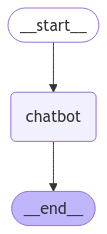

In [25]:
# Visualize the graph
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [27]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

user_input = input("User: ")
stream_graph_updates(user_input)

Assistant: LangChain is a framework for developing applications powered by large language models (LLMs).  It's designed to make it easier to build applications that leverage the capabilities of LLMs while addressing some of their limitations.  Here's a breakdown of its key features and aspects:

**Core Features:**

* **Modular Design:** LangChain is built with modularity in mind.  This allows developers to easily swap out different components (LLMs, prompts, memory, etc.) to customize their applications.  This flexibility is a major strength.

* **LLM Integration:**  It seamlessly integrates with various LLMs, including OpenAI, Hugging Face Hub models, and others.  This means you're not locked into a single provider.

* **Prompt Management:**  LangChain provides tools for managing and optimizing prompts.  This is crucial because the effectiveness of an LLM heavily depends on the quality of the prompt.  Features include prompt templates and chain-of-thought prompting.

* **Memory:**  LL

In [28]:
from langchain_community.tools import TavilySearchResults


In [36]:
tool = TavilySearchResults(
    max_results=5,
    search_depth="advanced",
    include_answer=False,
    include_raw_content=True,
    include_images=False,
)

In [37]:
res = tool.invoke({"query": "What happened at the last wimbledon"})
res

[{'url': 'https://www.nytimes.com/athletic/live-blogs/wimbledon-2024-live-updates-alcaraz-djokovic-mens-final-result/kJJdTKhOgkZo/mGpXBR2QIift/',
  'content': "Carlos Alcaraz beats Novak Djokovic to win the men's singles final In the 2023 final, Carlos Alcaraz won his first Wimbledon title, and only his second Grand Slam title, after beating Novak Djokovic in a five-set thriller on Centre Court. GO FURTHER Novak Djokovic and Carlos Alcaraz’s Wimbledon final is a duel of extraordinary quests Novak Djokovic set up a Wimbledon rematch with Carlos Alcaraz by beating Lorenzo Musetti, 6-4, 7-6, 6-3 on Centre Court on Friday, concluding his run to the final at the All England Club that started just 25 days after surgery on a torn meniscus in his right knee. GO FURTHER Novak Djokovic beats Lorenzo Musetti for Wimbledon final against Carlos Alcaraz"},
 {'url': 'https://www.atptour.com/en/news/djokovic-wimbledon-2024-final-reaction',
  'content': "Novak Djokovic accepting of Carlos Alcaraz defea

In [42]:
res[0]

{'url': 'https://www.nytimes.com/athletic/live-blogs/wimbledon-2024-live-updates-alcaraz-djokovic-mens-final-result/kJJdTKhOgkZo/mGpXBR2QIift/',
 'content': "Carlos Alcaraz beats Novak Djokovic to win the men's singles final In the 2023 final, Carlos Alcaraz won his first Wimbledon title, and only his second Grand Slam title, after beating Novak Djokovic in a five-set thriller on Centre Court. GO FURTHER Novak Djokovic and Carlos Alcaraz’s Wimbledon final is a duel of extraordinary quests Novak Djokovic set up a Wimbledon rematch with Carlos Alcaraz by beating Lorenzo Musetti, 6-4, 7-6, 6-3 on Centre Court on Friday, concluding his run to the final at the All England Club that started just 25 days after surgery on a torn meniscus in his right knee. GO FURTHER Novak Djokovic beats Lorenzo Musetti for Wimbledon final against Carlos Alcaraz"}

In [44]:
from tavily import TavilyClient
tavily = TavilyClient(api_key=os.environ["TAVILY_API_KEY"])

In [54]:
res = tavily.search('What happened at wimbledon last year?')

In [56]:
res['results'][0]

{'title': "Who won Wimbledon last year? Men's and women's singles champions at UK ...",
 'url': 'https://www.sportingnews.com/us/tennis/news/who-won-wimbledon-2023-last-year-mens-womens-title-grand-slam-tennis/b91b5ee6d89a0e0d2c4b0890',
 'content': "Last year's Wimbledon tournament saw history being made, with an unseeded player winning the ladies' singles for the first time ever. Marketa Vondrousova was ranked at 42 in the world before the",
 'score': 0.9828892,
 'raw_content': None}